### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [188]:
data = pd.read_csv('data/coupons.csv')

In [190]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [192]:
#Trying to understand the coupon categories

data['coupon'].value_counts()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

2. Investigate the dataset for missing or problematic data.

In [195]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [198]:
##Replacing nulls with NA since filling with other values may skew the data
data_updated=data
data_updated['car'] = data['car'].fillna('NA')
data_updated['Bar']=data['Bar'].fillna('NA')
data_updated['CoffeeHouse']=data['CoffeeHouse'].fillna('NA')
data_updated['CarryAway']=data['CarryAway'].fillna('NA')
data_updated['RestaurantLessThan20']=data['RestaurantLessThan20'].fillna('NA')
data_updated['Restaurant20To50']=data['Restaurant20To50'].fillna('NA')
data_updated.isna().sum()





destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon?



In [201]:
data_updated["Y"].value_counts()[1]/data_updated["Y"].value_counts().sum()

0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

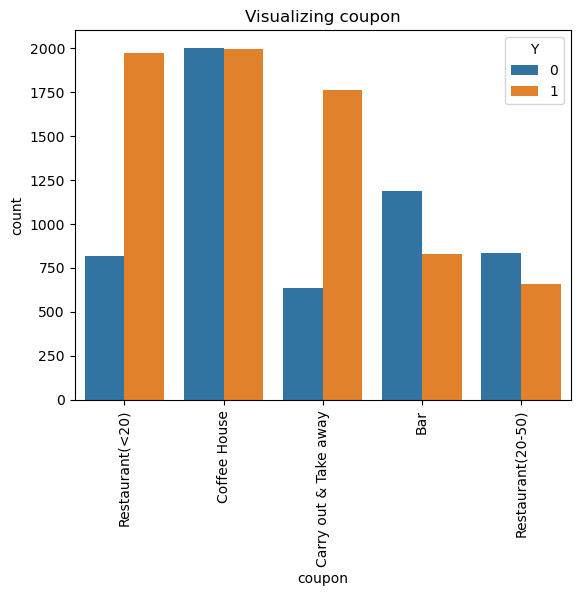

In [204]:
sns.countplot(data=data_updated,x='coupon',hue='Y')
plt.title('Visualizing coupon')
plt.xticks(rotation=90)

6. Use a histogram to visualize the temperature column.

([0, 1, 2], [Text(0, 0, '30'), Text(1, 0, '55'), Text(2, 0, '80')])

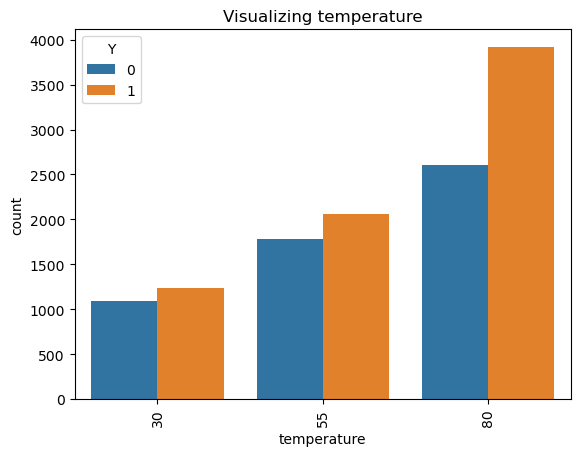

In [207]:
sns.countplot(data=data_updated,x='temperature',hue='Y')
plt.title('Visualizing temperature')
plt.xticks(rotation=90)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [210]:
bar_DF=data_updated.query('coupon=="Bar"')
bar_DF.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 9 to 12682
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passanger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   object
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-null   object
 14  car                   2017 non-null   object
 15  Bar                   2017 non-null   obje

2. What proportion of bar coupons were accepted?


In [213]:
#Proportion here would be the ratio between the number of 1s in Column Y to the total number of entries
acceptance_rate = bar_DF['Y'].value_counts()[1]/bar_DF['Y'].value_counts().sum()
print("Acceptance rate of bar coupons is ", f"{acceptance_rate:.2%}")

Acceptance rate of bar coupons is  41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Acceptance rate of those who went to a bar more than 3 times is  39.82%  more than those who went 3 or less times


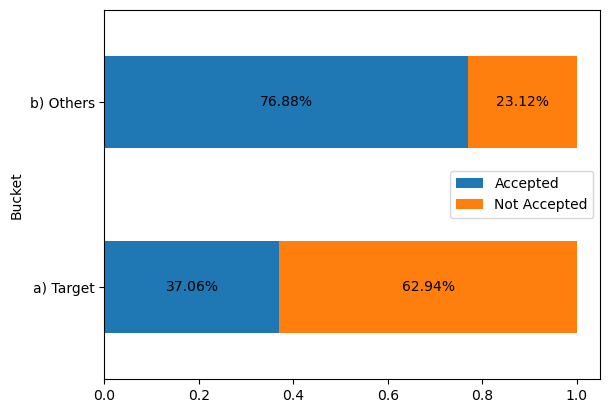

In [217]:

##For getting the required stats let's categorise categories 1~3 , less1 and never into one group. Then 4~8 and gt8 into another 
## Ratio of the below 2 values are taken to find acceptance rate of people who went to a bar <=3 times:
## a) Numerator: Queries for entries that has values never, less1 and 1~3 in the Bar column and sums Column Y to get the number of acceptance.
## b) Denominator: Queries for entries that has values never, less1 and 1~3 in the Bar column and counts Column Y to get total record count
AR_3orFew=bar_DF.query('Bar=="1~3" or Bar=="less1" or Bar=="never"')['Y'].sum() / bar_DF.query('Bar=="1~3" or Bar=="less1" or Bar=="never"')['Y'].count()

## Ratio of the below 2 values are taken to find acceptance rate of people who went to a bar >3 times:
## a) Numerator: Queries for entries that has values 4~8 and gt8 in the Bar column and sums Column Y to get the number of acceptance.
## b) Denominator: Queries for entries that has values 4~8 and gt8 in the Bar column and counts Column Y to get total record count

AR_4orMore = bar_DF.query('Bar=="4~8" or Bar=="gt8"')['Y'].sum() / bar_DF.query('Bar=="4~8" or Bar=="gt8"')['Y'].count()

##Comparing acceptance rates for the 2 results above
Diff_acceptance_rate=AR_4orMore-AR_3orFew
print("Acceptance rate of those who went to a bar more than 3 times is ",f"{Diff_acceptance_rate:.2%}"," more than those who went 3 or less times")
#print(Diff_acceptance_rate,AR_4orMore,AR_3orFew)

#plot graph
chart_data = {"Bucket": ["a) Target", "b) Others"],
              "Accepted": [AR_3orFew,AR_4orMore],
              "Not Accepted": [1-AR_3orFew,1-AR_4orMore]
             }
chart_DF = pd.DataFrame(chart_data)

#To prepare the stacked bar charts, group the data by Bucket
chart_DF_grouped = chart_DF.groupby('Bucket')[['Accepted', 'Not Accepted']].sum()
chart = chart_DF_grouped.plot(kind='barh', stacked=True)
chart.bar_label(chart.containers[0], labels=[f"{AR_3orFew:.2%}",f"{AR_4orMore:.2%}"], label_type = "center")
chart.bar_label(chart.containers[1], labels=[f"{1-AR_3orFew:.2%}",f"{1-AR_4orMore:.2%}"],label_type = "center")

plt.show()


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Acceptance rate of drivers 25 and above who went to a bar more than once a month is  39.86%  more than all others


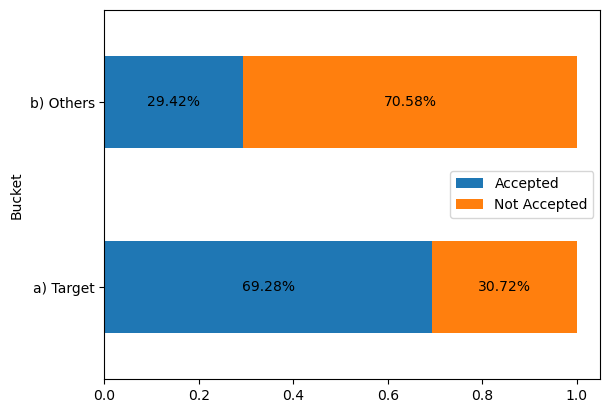

In [221]:

##Acceptance rate for drivers who go to a bar more than once a month and are over 25 can be calculated as ratio of the 2 below:
## a) Numerator: Queries for entries that has values 1~3,4~8 or gt8 in the Bar column and doesn't have 21 or below 21 in the Age column. Column Y is then summed up to get the number of acceptances.
## b) Denominator: Queries for entries that has values 1~3,4~8 or gt8 in the Bar column and doesn't have 21 or below 21 in the Age column. Column Y is then counted to get the total number of drivers.
AR_oncemonth_over25=bar_DF.query('(Bar=="1~3" or Bar=="4~8" or Bar=="gt8") and (age!=21 and age!="below21")')['Y'].sum()/bar_DF.query('(Bar=="1~3" or Bar=="4~8" or Bar=="gt8") and (age!=21 and age!="below21")')['Y'].count()
AR_oncemonth_over25

##Acceptance rate for all other drivers can be calculated as ratio of the 2 below:
## a) Numerator: Difference between Sum of Y for the entire dataset and the numerator from above - shows all acceptances outside the group who go to bar more than a month and are over 25 
## b) Denominator: Difference between total number of records in Y column and denominator from above - shows the number of drivers outside the group who go to bar more than a month and are over 25

AR_others = (bar_DF['Y'].sum()-bar_DF.query('(Bar=="1~3" or Bar=="4~8" or Bar=="gt8") and (age!=21 and age!="below21")')['Y'].sum()) / (bar_DF['Y'].count()-bar_DF.query('(Bar=="1~3" or Bar=="4~8" or Bar=="gt8") and (age!=21 and age!="below21")')['Y'].count())
AR_others

#Compare the 2 and show the result
Diff_acceptance_rate=AR_oncemonth_over25-AR_others
print("Acceptance rate of drivers 25 and above who went to a bar more than once a month is ",f"{Diff_acceptance_rate:.2%}"," more than all others")

#plot graph
chart_data = {"Bucket": ["a) Target", "b) Others"],
              "Accepted": [AR_oncemonth_over25,AR_others],
              "Not Accepted": [1-AR_oncemonth_over25,1-AR_others]
             }
chart_DF = pd.DataFrame(chart_data)

#To prepare the stacked bar charts, group the data by Bucket
chart_DF_grouped = chart_DF.groupby('Bucket')[['Accepted', 'Not Accepted']].sum()
chart = chart_DF_grouped.plot(kind='barh', stacked=True)
chart.bar_label(chart.containers[0], labels=[f"{AR_oncemonth_over25:.2%}",f"{AR_others:.2%}"], label_type = "center")
chart.bar_label(chart.containers[1], labels=[f"{1-AR_oncemonth_over25:.2%}",f"{1-AR_others:.2%}"],label_type = "center")

plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


Acceptance rate of drivers with the target properties is  41.72%  more than all others


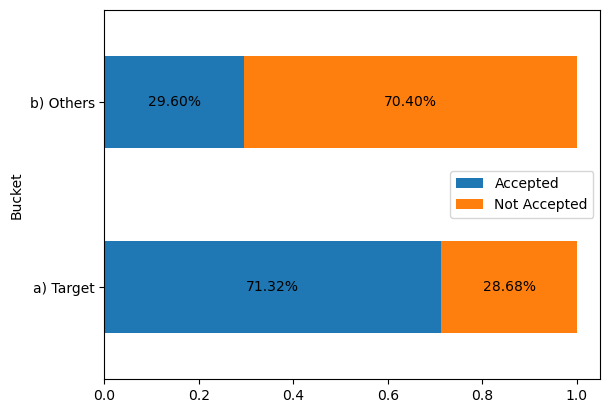

In [224]:

#Get the target dataset which has only the records of drivers who go to bars more than once a month, has no kid passengers and has occupation other than farming, fishing and forestry
Target_dataset = bar_DF.query('(Bar=="1~3" or Bar=="4~8" or Bar=="gt8") and (passanger != "Kid(s)") and (occupation != "Farming Fishing & Forestry")')
#Target_dataset.to_clipboard()

##Acceptance rate is the ratio of the below 2 values:
## a) Numerator: Sum of column Y in the above obtained dataset
## b) Denominator: Count of records in the above obtained dataset
Target_AR = Target_dataset['Y'].sum() / Target_dataset['Y'].count()
Target_AR

##Acceptance rate for all other drivers can be calculated as ratio of the 2 below:
## a) Numerator: Difference between Sum of Y for the entire dataset and the numerator from above
## b) Denominator: Difference between total number of records in Y column and denominator from above

AR_others = (bar_DF['Y'].sum()-Target_dataset['Y'].sum())/ (bar_DF['Y'].count()-Target_dataset['Y'].count())
AR_others

#Compare the 2 and show the result
Diff_acceptance_rate=Target_AR-AR_others
print("Acceptance rate of drivers with the target properties is ",f"{Diff_acceptance_rate:.2%}"," more than all others")

#plot graph
chart_data = {"Bucket": ["a) Target", "b) Others"],
              "Accepted": [Target_AR,AR_others],
              "Not Accepted": [1-Target_AR,1-AR_others]
             }
chart_DF = pd.DataFrame(chart_data)

#To prepare the stacked bar charts, group the data by Bucket
chart_DF_grouped = chart_DF.groupby('Bucket')[['Accepted', 'Not Accepted']].sum()
chart = chart_DF_grouped.plot(kind='barh', stacked=True)
chart.bar_label(chart.containers[0], labels=[f"{Target_AR:.2%}",f"{AR_others:.2%}"], label_type = "center")
chart.bar_label(chart.containers[1], labels=[f"{1-Target_AR:.2%}",f"{1-AR_others:.2%}"],label_type = "center")

plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



Acceptance rate of drivers with the target properties is  27.54%  more than all others


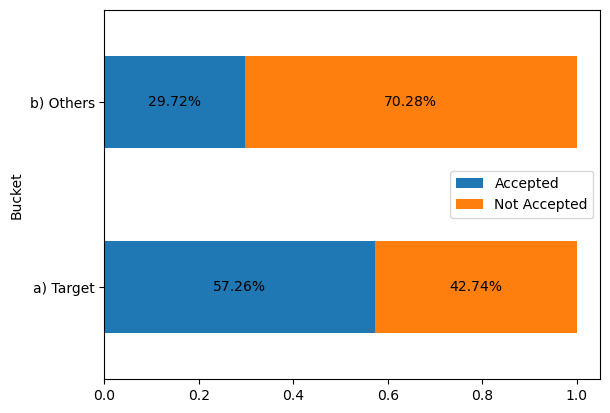

In [227]:

#Get the target dataset which has only the records matching the below criteria:
#go to bars more than once a month, had passengers that were not a kid, and were not widowed OR [Syntax: (Bar=="1~3" or Bar=="4~8" or Bar=="gt8") and (passanger != "Kid(s)") and (maritalStatus != "Widowed")]
#go to bars more than once a month and are under the age of 30 OR [Syntax: ((Bar=="1~3" or Bar=="4~8" or Bar=="gt8") and (age in ["21", "26", "below21"]))]
#go to cheap restaurants more than 4 times a month and income is less than 50K. [Syntax: ((RestaurantLessThan20 == "4~8" or RestaurantLessThan20 == "gt8") and (income not in ["$37500 - $49999","$12500 - $24999","$25000 - $37499", "Less than $12500"]))]
Target_dataset = bar_DF.query('((Bar=="1~3" or Bar=="4~8" or Bar=="gt8") and (passanger != "Kid(s)") and (maritalStatus != "Widowed")) or ((Bar=="1~3" or Bar=="4~8" or Bar=="gt8") and (age in ["21", "26", "below21"])) or ((RestaurantLessThan20 == "4~8" or RestaurantLessThan20 == "gt8") and (income not in ["$37500 - $49999","$12500 - $24999","$25000 - $37499", "Less than $12500"]))') 
#Target_dataset.to_clipboard()

##Acceptace rate is the ratio of the below 2 values:
## a) Numerator: Sum of column Y in the above obtained dataset
## b) Denominator: Count of records in the above obtained dataset
Target_AR = Target_dataset['Y'].sum() / Target_dataset['Y'].count()
Target_AR

##Acceptace rate for all other drivers can be calculated as ratio of the 2 below:
## a) Numerator: Difference between Sum of Y for the entire dataset and the numerator from above
## b) Denominator: Difference between total number of records in Y column and denominator from above

AR_others = (bar_DF['Y'].sum()-Target_dataset['Y'].sum())/ (bar_DF['Y'].count()-Target_dataset['Y'].count())
AR_others

#Compare the 2 and show the result
Diff_acceptance_rate=Target_AR-AR_others
print("Acceptance rate of drivers with the target properties is ",f"{Diff_acceptance_rate:.2%}"," more than all others")

#plot graph
chart_data = {"Bucket": ["a) Target", "b) Others"],
              "Accepted": [Target_AR,AR_others],
              "Not Accepted": [1-Target_AR,1-AR_others]
             }
chart_DF = pd.DataFrame(chart_data)

#To prepare the stacked bar charts, group the data by Bucket
chart_DF_grouped = chart_DF.groupby('Bucket')[['Accepted', 'Not Accepted']].sum()
chart = chart_DF_grouped.plot(kind='barh', stacked=True)
chart.bar_label(chart.containers[0], labels=[f"{Target_AR:.2%}",f"{AR_others:.2%}"], label_type = "center")
chart.bar_label(chart.containers[1], labels=[f"{1-Target_AR:.2%}",f"{1-AR_others:.2%}"],label_type = "center")

plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

<i>We see the below inferences from the above questions:</i>

<i>a) Acceptance rate of drivers who went to a bar more than 3 times is 40% higher than others</i>

<i>b) Acceptance rate of drivers 25 and above who went to a bar more than once a month is 40% higher than others</i>

<i>c) Acceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid and had occupations other than farming, fishing, or forestry is 41% higher than others</i>

<i>Looking at the above, we can infer than drivers who are aged 25+, who go to bars 3 or more times and who do not have a kid should have a very high acceptance rate (78% as shown from the below calculations)</i>

Acceptance rate for the hypothesis (drivers aged 25+ who go to bars 3+ times a month and have no kids) is 78.12%


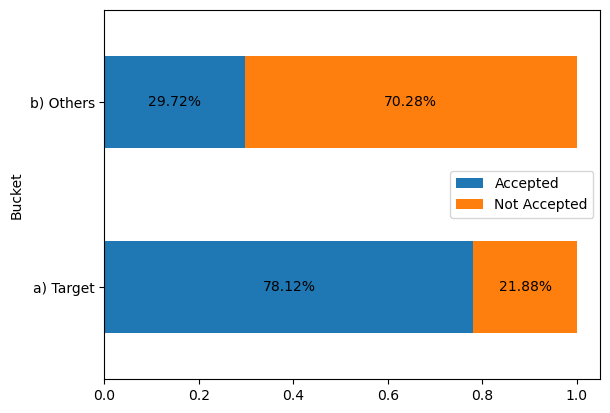

In [231]:

#Get the target dataset
Target_dataset = bar_DF.query('(Bar=="4~8" or Bar=="gt8") and (passanger != "Kid(s)") and (age not in ["21", "below21"])')
#Target_dataset.to_clipboard()

##Acceptace rate is the ratio of the below 2 values:
## a) Numerator: Sum of column Y in the above obtained dataset
## b) Denominator: Count of records in the above obtained dataset
Target_AR = Target_dataset['Y'].sum() / Target_dataset['Y'].count()
print ("Acceptance rate for the hypothesis (drivers aged 25+ who go to bars 3+ times a month and have no kids) is " +  f"{Target_AR:.2%}")

#plot graph
chart_data = {"Bucket": ["a) Target", "b) Others"],
              "Accepted": [Target_AR,AR_others],
              "Not Accepted": [1-Target_AR,1-AR_others]
             }
chart_DF = pd.DataFrame(chart_data)

#To prepare the stacked bar charts, group the data by Bucket
chart_DF_grouped = chart_DF.groupby('Bucket')[['Accepted', 'Not Accepted']].sum()
chart = chart_DF_grouped.plot(kind='barh', stacked=True)
chart.bar_label(chart.containers[0], labels=[f"{Target_AR:.2%}",f"{AR_others:.2%}"], label_type = "center")
chart.bar_label(chart.containers[1], labels=[f"{1-Target_AR:.2%}",f"{1-AR_others:.2%}"],label_type = "center")

plt.show()

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

<u> Coupon group considered here: Coffee House </u>

In [235]:
#Creating a Dataframe with only those that has Coffee House as the coupon value
ch_DF=data_updated.query('coupon=="Coffee House"')
ch_DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3996 entries, 1 to 12681
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3996 non-null   object
 1   passanger             3996 non-null   object
 2   weather               3996 non-null   object
 3   temperature           3996 non-null   int64 
 4   time                  3996 non-null   object
 5   coupon                3996 non-null   object
 6   expiration            3996 non-null   object
 7   gender                3996 non-null   object
 8   age                   3996 non-null   object
 9   maritalStatus         3996 non-null   object
 10  has_children          3996 non-null   int64 
 11  education             3996 non-null   object
 12  occupation            3996 non-null   object
 13  income                3996 non-null   object
 14  car                   3996 non-null   object
 15  Bar                   3996 non-null   obje

Activity 1: Determine the overall acceptance rate of Coffee House coupons 

In [238]:
#Overall acceptance rate of Coffee House coupons
acceptance_rate = ch_DF['Y'].value_counts()[1]/ch_DF['Y'].value_counts().sum()
print("Acceptance rate of Coffee House coupons is ", f"{acceptance_rate:.2%}")

Acceptance rate of Coffee House coupons is  49.92%


Activity 2: Determine the acceptance rate of those who went to Coffee House 4 or more times vs others

Acceptance rate of drivers with the target properties is  22.54%  more than all others


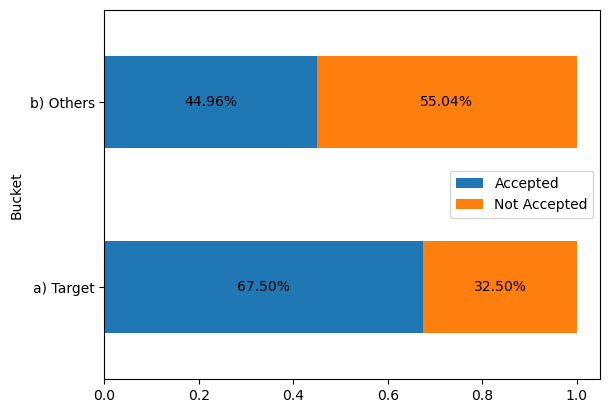

In [241]:
#Question: Acceptance rate of those who went to Coffee House 4 or more times vs others

#Part1: Find acceptance rate of those who went to Coffee House 4 or more times
Target_dataset = ch_DF.query('(CoffeeHouse=="4~8" or CoffeeHouse=="gt8")') 
#Target_dataset.to_clipboard()

Target_AR = Target_dataset['Y'].sum() / Target_dataset['Y'].count()
Target_AR

#Part2: Find acceptance rate of all others

AR_others = (ch_DF['Y'].sum()-Target_dataset['Y'].sum())/ (ch_DF['Y'].count()-Target_dataset['Y'].count())
AR_others

#Compare the 2 and show the result
Diff_acceptance_rate=Target_AR-AR_others
print("Acceptance rate of drivers with the target properties is ", f"{Diff_acceptance_rate:.2%}"," more than all others")

#plot graph
chart_data = {"Bucket": ["a) Target", "b) Others"],
              "Accepted": [Target_AR,AR_others],
              "Not Accepted": [1-Target_AR,1-AR_others]
             }
chart_DF = pd.DataFrame(chart_data)

#To prepare the stacked bar charts, group the data by Bucket
chart_DF_grouped = chart_DF.groupby('Bucket')[['Accepted', 'Not Accepted']].sum()
chart = chart_DF_grouped.plot(kind='barh', stacked=True)
chart.bar_label(chart.containers[0], labels=[f"{Target_AR:.2%}",f"{AR_others:.2%}"], label_type = "center")
chart.bar_label(chart.containers[1], labels=[f"{1-Target_AR:.2%}",f"{1-AR_others:.2%}"],label_type = "center")

plt.show()


Activity 3: Determine acceptance rate of those under 21 years of age vs all others

Acceptance rate of drivers with the target properties is  20.55%  more than all others


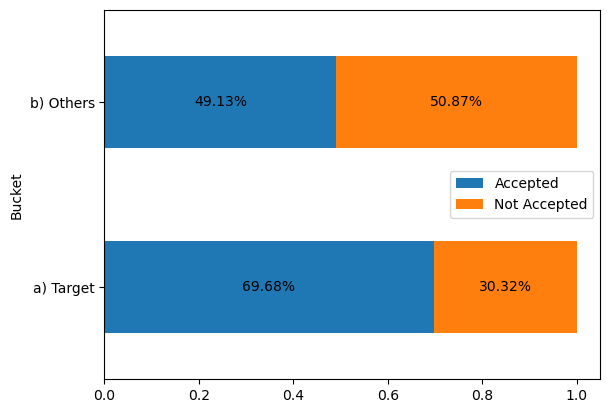

In [244]:
#Question: Acceptance rate of those under 21 years of age vs all others

#Part1: Find acceptance rate of those under 21 years of age vs all others
Target_dataset = ch_DF.query('(age=="below21")') 
#Target_dataset.to_clipboard()

Target_AR = Target_dataset['Y'].sum() / Target_dataset['Y'].count()
Target_AR

#Part2: Find acceptance rate of all others

AR_others = (ch_DF['Y'].sum()-Target_dataset['Y'].sum())/ (ch_DF['Y'].count()-Target_dataset['Y'].count())
AR_others

#Compare the 2 and show the result
Diff_acceptance_rate=Target_AR-AR_others
print("Acceptance rate of drivers with the target properties is ", f"{Diff_acceptance_rate:.2%}"," more than all others")

#plot graph
chart_data = {"Bucket": ["a) Target", "b) Others"],
              "Accepted": [Target_AR,AR_others],
              "Not Accepted": [1-Target_AR,1-AR_others]
             }
chart_DF = pd.DataFrame(chart_data)

#To prepare the stacked bar charts, group the data by Bucket
chart_DF_grouped = chart_DF.groupby('Bucket')[['Accepted', 'Not Accepted']].sum()
chart = chart_DF_grouped.plot(kind='barh', stacked=True)
chart.bar_label(chart.containers[0], labels=[f"{Target_AR:.2%}",f"{AR_others:.2%}"], label_type = "center")
chart.bar_label(chart.containers[1], labels=[f"{1-Target_AR:.2%}",f"{1-AR_others:.2%}"],label_type = "center")

plt.show()


Activity 4: Determine the acceptance rate of those to which coffee house coupon was given on or before 10 AM compared to others

Acceptance rate of drivers with the target properties is  7.91%  more than all others


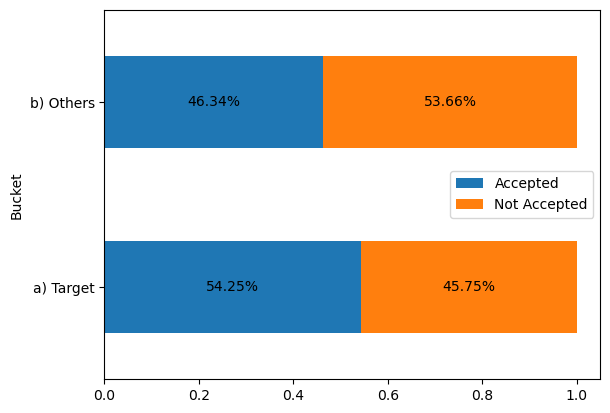

In [247]:
#Question: Acceptance rate of those to which coffee house coupon was given on or before 10 AM compared to others

#Part1: Find acceptance rate of those to which coffee house coupon was given on or before 10 AM compared to others
Target_dataset = ch_DF.query('(time=="10AM" or time=="7AM")') 

Target_AR = Target_dataset['Y'].sum() / Target_dataset['Y'].count()
Target_AR

#Part2: Find acceptance rate of all others

AR_others = (ch_DF['Y'].sum()-Target_dataset['Y'].sum())/ (ch_DF['Y'].count()-Target_dataset['Y'].count())
AR_others

#Compare the 2 and show the result
Diff_acceptance_rate=Target_AR-AR_others
print("Acceptance rate of drivers with the target properties is ", f"{Diff_acceptance_rate:.2%}"," more than all others")

#plot graph
chart_data = {"Bucket": ["a) Target", "b) Others"],
              "Accepted": [Target_AR,AR_others],
              "Not Accepted": [1-Target_AR,1-AR_others]
             }
chart_DF = pd.DataFrame(chart_data)

#To prepare the stacked bar charts, group the data by Bucket
chart_DF_grouped = chart_DF.groupby('Bucket')[['Accepted', 'Not Accepted']].sum()
chart = chart_DF_grouped.plot(kind='barh', stacked=True)
chart.bar_label(chart.containers[0], labels=[f"{Target_AR:.2%}",f"{AR_others:.2%}"], label_type = "center")
chart.bar_label(chart.containers[1], labels=[f"{1-Target_AR:.2%}",f"{1-AR_others:.2%}"],label_type = "center")

plt.show()


<b>Hypothesis: </b>
<i>Based on the above executions, a good hypothesis can be that drivers who visit a coffee shop 4 or more times a month at or before 10 am have a high acceptance rate of Coffee House coupons.</i>

In [251]:
#Hypothesis: Drivers have a higher acceptance rate for Coffee House coupons in the morning, especially when they visit 4+ times a month
Target_dataset = ch_DF.query('(time=="10AM" and (CoffeeHouse=="4~8" or CoffeeHouse=="gt8") )') 

Target_AR = Target_dataset['Y'].sum() / Target_dataset['Y'].count()
print ("Acceptance rate for the hypothesis (drivers visiting coffee house at or before 10 AM and visit 4 or more times a month) is ", f"{Target_AR:.2%}")

Acceptance rate for the hypothesis (drivers visiting coffee house at or before 10 AM and visit 4 or more times a month) is  81.63%
